Times.ipynb is a project to look at the occurrence of particular words in New York TImes articles over times, and analyze these trends in relation to political and historical events/trends.

First I conduct a count of particular words in the entire corpus (only first paragraphs of articles, seemingly missing data for 1905-1930, and 1964). Then, I graph the occurence of different words over time, from 1970 until 2017.

Data is sourced from: https://www.kaggle.com/parsonsandrew1/nytimes-article-lead-paragraphs-18512017

In [1]:
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt

articles = []
with open("data.csv") as f:
    count = 0
    for x in f:
        #Here, we count words in all the articles, but many analyses really only require some random sample
        if count % 1 == 0:
            articles.append(f.readline())
        count += 1
articles = articles[1:] #remove header

In [2]:
date = []
text = []
for i in articles:
    try:
        text.append(i.split('	')[1])
        date.append(i.split('	')[0])
    except:
        do_nothing = 1 #exclude articles with the tab character within
count = 0
for i in text:
    count += len(i)
    
#Get total entries, ave entries per day
print(count)
print(len(date)/((2017-1851-25)*365))

1293208175
77.7876226561741


In [3]:
#Get cleaned date strings from date-entry column
clean_dates = []
for i in date:
    hold = (i[:-1])
    clean_dates.append(i.split('T')[0])
print(clean_dates[1000])

1851-12-13


In [4]:
#get list of all the words present, uncleaned, grouped by article
words = []
for i in text:
    hold = i.split(' ')
    words.append(hold)

In [5]:
#clean away non-alphabetical characters (turns compund words with -'s into cojoined words')
regex = re.compile('[^a-zA-Z]')
clean_words = []
for i in range(0, len(words)):
    hold = []
    for j in words[i]:
        hold.append(regex.sub('', j).lower())
    clean_words.append(hold)

In [6]:
#flatten list of article word lists into 1-D list
flat = []
for sub in clean_words:
    for item in sub:
        flat.append(item)

word_dict = dict.fromkeys(flat, 0)

In [7]:
#Count occurence of each word
for i in clean_words:
    for j in i:
        word_dict[j] += 1

In [8]:
import operator
sorted_dict = sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)

In [9]:
#A list of all the present words, from most to least common
print(sorted_dict[0:100000])

[('the', 14291235), ('of', 7993132), ('', 6916025), ('a', 5276352), ('and', 5188480), ('to', 4685713), ('in', 4651049), ('for', 2015315), ('that', 1782723), ('on', 1695096), ('at', 1623716), ('is', 1501265), ('was', 1479544), ('by', 1426099), ('with', 1196288), ('as', 1083748), ('new', 987474), ('from', 959055), ('his', 950945), ('it', 940804), ('an', 886167), ('be', 830569), ('he', 818086), ('has', 807671), ('today', 734710), ('this', 683895), ('are', 654576), ('will', 642205), ('have', 616162), ('who', 605871), ('its', 592420), ('yesterday', 583460), ('said', 535429), ('were', 512322), ('but', 511775), ('not', 508642), ('which', 503667), ('their', 493941), ('been', 491586), ('last', 482774), ('had', 478391), ('york', 468343), ('one', 430578), ('mr', 418838), ('they', 402450), ('years', 385852), ('or', 374601), ('about', 367351), ('her', 358150), ('two', 357190), ('more', 354435), ('president', 347734), ('city', 344785), ('first', 329131), ('united', 318777), ('would', 317397), ('afte

Now, we can look for trends over time

In [10]:
#strip the cleaned dates down to just years
years = []
for i in range(0, len(clean_dates)):
    try:
        years.append((int(clean_dates[i][:4])))
    except:
        clean_words.remove(clean_words[i])

In [11]:
#find where in arrays we need to start, to only look at 1970 and later
for i in range(0, len(years)):
    if years[i] == 1970:
        start = i
        break;
print(start)

1929735


In [13]:
#get word counts for each year in range
by_year = []

for i in range(0, 2017 - 1969):
    by_year.append(dict.fromkeys(flat, 0))
    print(i, end=' ') #progress counter, takes a long time and uses up entire memory

for i in range(start, len(years)):
    for j in clean_words[i]:
        by_year[years[i] - 1970][j] += 1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 

The graphs below show distribution of mentions over time, for the surname of each president in the period, as mentions/total words

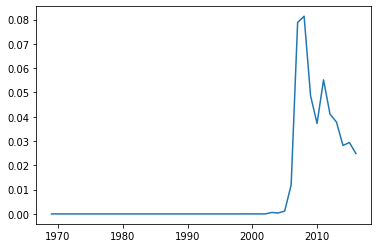

In [14]:
obama_list = []

for i in range(0, 2017 - 1969):
    obama_list.append((by_year[i]["obama"] / sum(by_year[i].values())) * 100)

sns.lineplot(range(1969, 2017), obama_list);

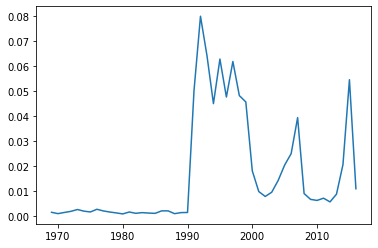

In [15]:
clinton_list = []

for i in range(0, 2017 - 1969):
    clinton_list.append((by_year[i]["clinton"] / sum(by_year[i].values())) * 100)

sns.lineplot(range(1969, 2017), clinton_list);

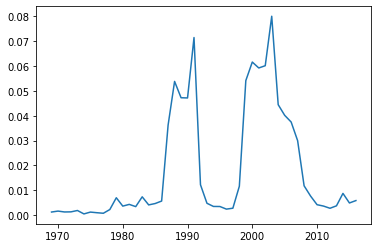

In [16]:
bush_list = []

for i in range(0, 2017 - 1969):
    bush_list.append((by_year[i]["bush"] / sum(by_year[i].values())) * 100)

sns.lineplot(range(1969, 2017), bush_list);

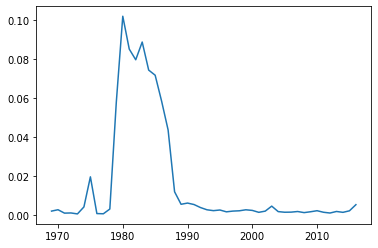

In [17]:
reagan_list = []

for i in range(0, 2017 - 1969):
    reagan_list.append((by_year[i]["reagan"] / sum(by_year[i].values())) * 100)

sns.lineplot(range(1969, 2017), reagan_list);

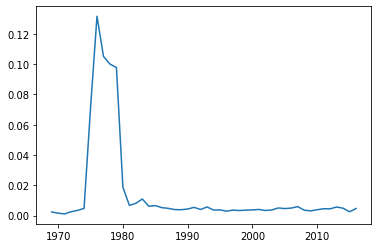

In [18]:
carter_list = []

for i in range(0, 2017 - 1969):
    carter_list.append((by_year[i]["carter"] / sum(by_year[i].values())) * 100)

sns.lineplot(range(1969, 2017), carter_list);

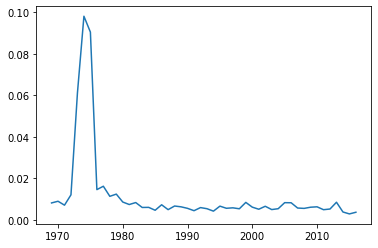

In [19]:
ford_list = []

for i in range(0, 2017 - 1969):
    ford_list.append((by_year[i]["ford"] / sum(by_year[i].values())) * 100)

sns.lineplot(range(1969, 2017), ford_list);

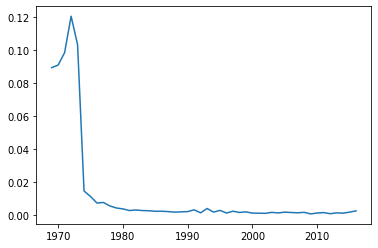

In [20]:
nixon_list = []

for i in range(0, 2017 - 1969):
    nixon_list.append((by_year[i]["nixon"] / sum(by_year[i].values())) * 100)

sns.lineplot(range(1969, 2017), nixon_list);

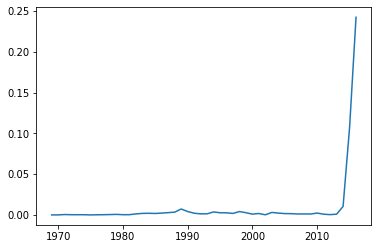

In [21]:
trump_list = []

for i in range(0, 2017 - 1969):
    trump_list.append((by_year[i]["trump"] / sum(by_year[i].values())) * 100)

sns.lineplot(range(1969, 2017), trump_list);

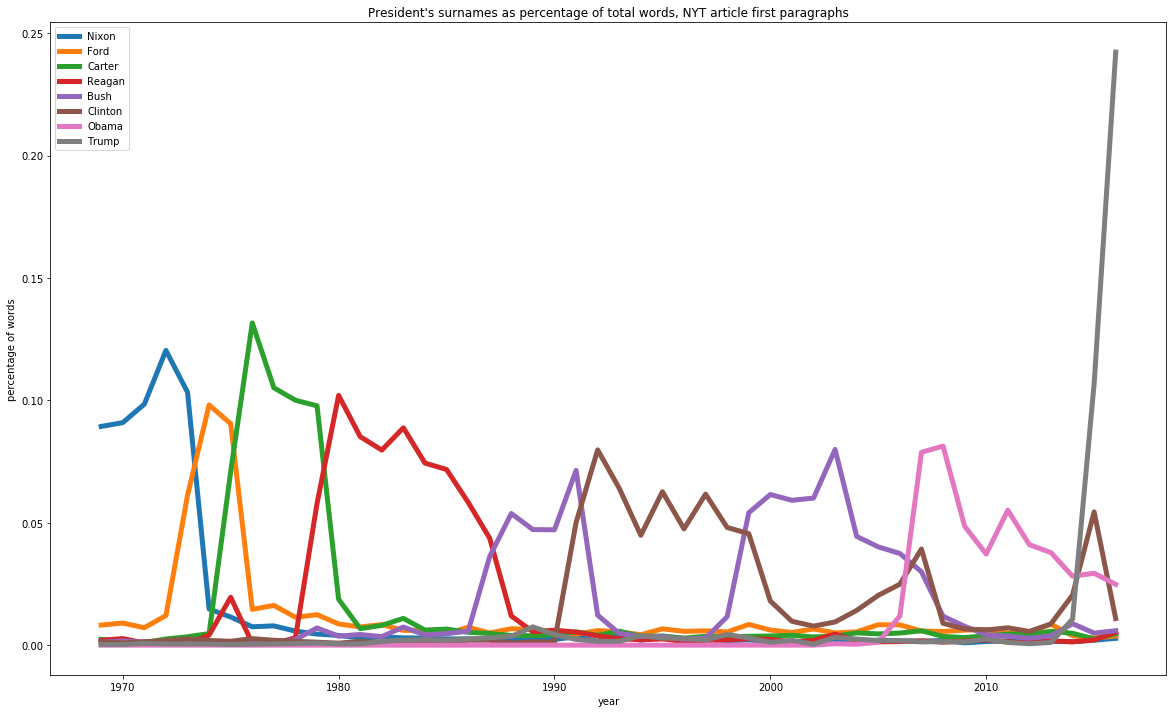

In [22]:
plt.figure(figsize=(20,12))
graph = sns.lineplot(range(1969, 2017), nixon_list, lw=5, label="Nixon");
sns.lineplot(range(1969, 2017), ford_list, lw=5, label="Ford");
sns.lineplot(range(1969, 2017), carter_list, lw=5, label="Carter");
sns.lineplot(range(1969, 2017), reagan_list, lw=5, label="Reagan");
sns.lineplot(range(1969, 2017), bush_list, lw=5, label="Bush");
sns.lineplot(range(1969, 2017), clinton_list, lw=5, label="Clinton");
sns.lineplot(range(1969, 2017), obama_list, lw=5, label="Obama");
sns.lineplot(range(1969, 2017), trump_list, lw=5, label="Trump");

graph.set(xlabel='year', ylabel='percentage of words');
graph.set_title("President's surnames as percentage of total words, NYT article first paragraphs");

This shows all the presidents superimposed. It's notable that, while each president tends to get mentioned less than the previous one, Trump breaks this trend with about twice as many appearances as prior office holders.

Now, onto mentions of different professions/fields of endeavor

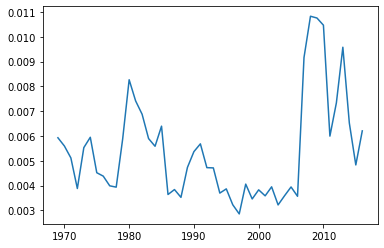

In [24]:
economist_list = []

for i in range(0, 2017 - 1969):
    economist_list.append(((by_year[i]["economics"] + by_year[i]["economist"])/ sum(by_year[i].values())) * 100)

sns.lineplot(range(1969, 2017), economist_list);

It's interesting that mentions of economics peak not only during the Great Recession, but also during the Reagan era.

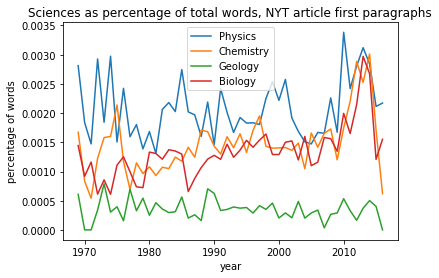

In [25]:
physics_list = []
chemistry_list = []
geology_list = []
biology_list = []

for i in range(0, 2017 - 1969):
    physics_list.append(((by_year[i]["physics"] + by_year[i]["physicist"])/ sum(by_year[i].values())) * 100)
    chemistry_list.append(((by_year[i]["chemistry"] + by_year[i]["chemist"])/ sum(by_year[i].values())) * 100)
    geology_list.append(((by_year[i]["geology"] + by_year[i]["geologist"])/ sum(by_year[i].values())) * 100)
    biology_list.append(((by_year[i]["biology"] + by_year[i]["biologist"])/ sum(by_year[i].values())) * 100)

    
graph = sns.lineplot(range(1969, 2017), physics_list, label="Physics");
sns.lineplot(range(1969, 2017), chemistry_list, label="Chemistry");
sns.lineplot(range(1969, 2017), geology_list, label="Geology");
sns.lineplot(range(1969, 2017), biology_list, label="Biology");

graph.set(xlabel='year', ylabel='percentage of words');
graph.set_title("Sciences as percentage of total words, NYT article first paragraphs");

There's not the same large historical trends as before, but it's notable all four dsicplines see a large decline in recent years - barring some reduction in noteworthy science, this could be due to a change in copy-editing policy.

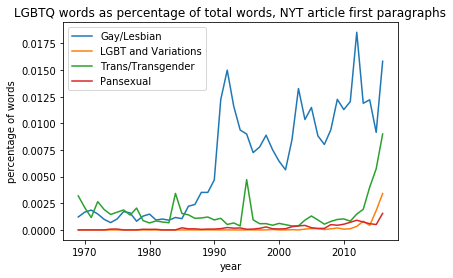

In [26]:
gay_lesbian_list = []
LGBT_list = []
trans_list = []
bi_list = []

for i in range(0, 2017 - 1969):
    gay_lesbian_list.append(((by_year[i]["gay"] + by_year[i]["lesbian"])/ sum(by_year[i].values())) * 100)
    LGBT_list.append(((by_year[i]["lgbt"] + by_year[i]["lgbtq"] + by_year[i]["lgb"])/ sum(by_year[i].values())) * 100)
    trans_list.append(((by_year[i]["trans"] + by_year[i]["transgender"])/ sum(by_year[i].values())) * 100)
    bi_list.append(((by_year[i]["bisexual"])/ sum(by_year[i].values())) * 100)

    
graph = sns.lineplot(range(1969, 2017), gay_lesbian_list, label="Gay/Lesbian");
sns.lineplot(range(1969, 2017), LGBT_list, label="LGBT and Variations");
sns.lineplot(range(1969, 2017), trans_list, label="Trans/Transgender");
sns.lineplot(range(1969, 2017), bi_list, label="Pansexual");

graph.set(xlabel='year', ylabel='percentage of words');
graph.set_title("LGBTQ words as percentage of total words, NYT article first paragraphs");

Some usage of the word "trans" could be for purposes other than describing a gender identity, but still, we see usage of all these words increasing in recent years, with major spikes in years with important relevant political/historical events.

To close out, we'll look at some historical phenomena

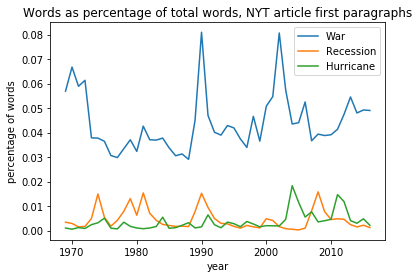

In [27]:
war_list = []
recession_list = []
hurricane_list = []

for i in range(0, 2017 - 1969):
    war_list.append(((by_year[i]["war"] + by_year[i]["warfare"])/ sum(by_year[i].values())) * 100)
    recession_list.append(((by_year[i]["recession"] + by_year[i]["recessions"])/ sum(by_year[i].values())) * 100)
    hurricane_list.append(((by_year[i]["hurricane"] + by_year[i]["hurricanes"])/ sum(by_year[i].values())) * 100)

    
graph = sns.lineplot(range(1969, 2017), war_list, label="War");
sns.lineplot(range(1969, 2017), recession_list, label="Recession");
sns.lineplot(range(1969, 2017), hurricane_list, label="Hurricane");

graph.set(xlabel='year', ylabel='percentage of words');
graph.set_title("Words as percentage of total words, NYT article first paragraphs");

Here, one cane find spikes corresponding to various historical events, including the Gulf War, Afghan/Iraq Wars, the Great Recession and other recessions, and Hurricanes Sandy and Katrina

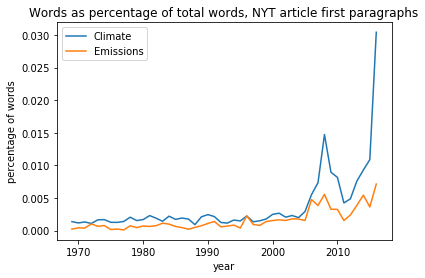

In [28]:
climate_list = []
emissions_list = []

for i in range(0, 2017 - 1969):
    climate_list.append(((by_year[i]["climate"])/ sum(by_year[i].values())) * 100)
    emissions_list.append(((by_year[i]["emissions"])/ sum(by_year[i].values())) * 100)
    
graph = sns.lineplot(range(1969, 2017), climate_list, label="Climate");
sns.lineplot(range(1969, 2017), emissions_list, label="Emissions");

graph.set(xlabel='year', ylabel='percentage of words');
graph.set_title("Words as percentage of total words, NYT article first paragraphs");

The early Obama and Trump eras both saw heightened public/political concern about climate change, albeit in very different political circumstances. It's also notable the term "climate" really  takes off much more than "emissions."

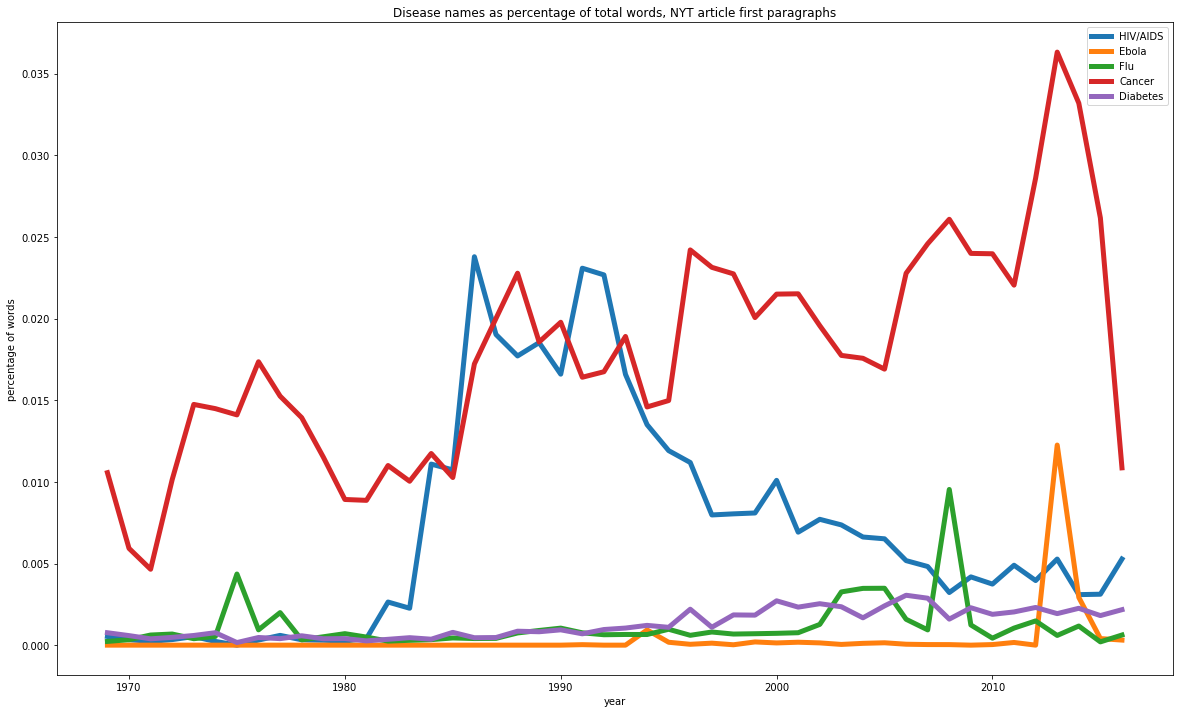

In [32]:
hiv_list = []
ebola_list = []
flu_list = []
cancer_list = []
diabetes_list = []

for i in range(0, 2017 - 1969):
    hiv_list.append(((by_year[i]["hiv"] + by_year[i]["aids"])/ sum(by_year[i].values())) * 100)
    ebola_list.append(((by_year[i]["ebola"])/ sum(by_year[i].values())) * 100)
    flu_list.append(((by_year[i]["flu"])/ sum(by_year[i].values())) * 100)
    cancer_list.append(((by_year[i]["cancer"])/ sum(by_year[i].values())) * 100)
    diabetes_list.append(((by_year[i]["diabetes"] + by_year[i]["diabetic"])/ sum(by_year[i].values())) * 100)

plt.figure(figsize=(20,12))
graph = sns.lineplot(range(1969, 2017), hiv_list, lw=5, label="HIV/AIDS");
sns.lineplot(range(1969, 2017), ebola_list, lw=5, label="Ebola");
sns.lineplot(range(1969, 2017), flu_list, lw=5, label="Flu");
sns.lineplot(range(1969, 2017), cancer_list, lw=5, label="Cancer");
sns.lineplot(range(1969, 2017), diabetes_list, lw=5, label="Diabetes");

graph.set(xlabel='year', ylabel='percentage of words');
graph.set_title("Disease names as percentage of total words, NYT article first paragraphs");

This graph captures the HIV crisis, several flu, and one ebola epidemics, increasing reporting on cancer (followed by, as with the sciences, a sudden drop in the past few years), and slowly increasing but relatively modest interest in diabetes.

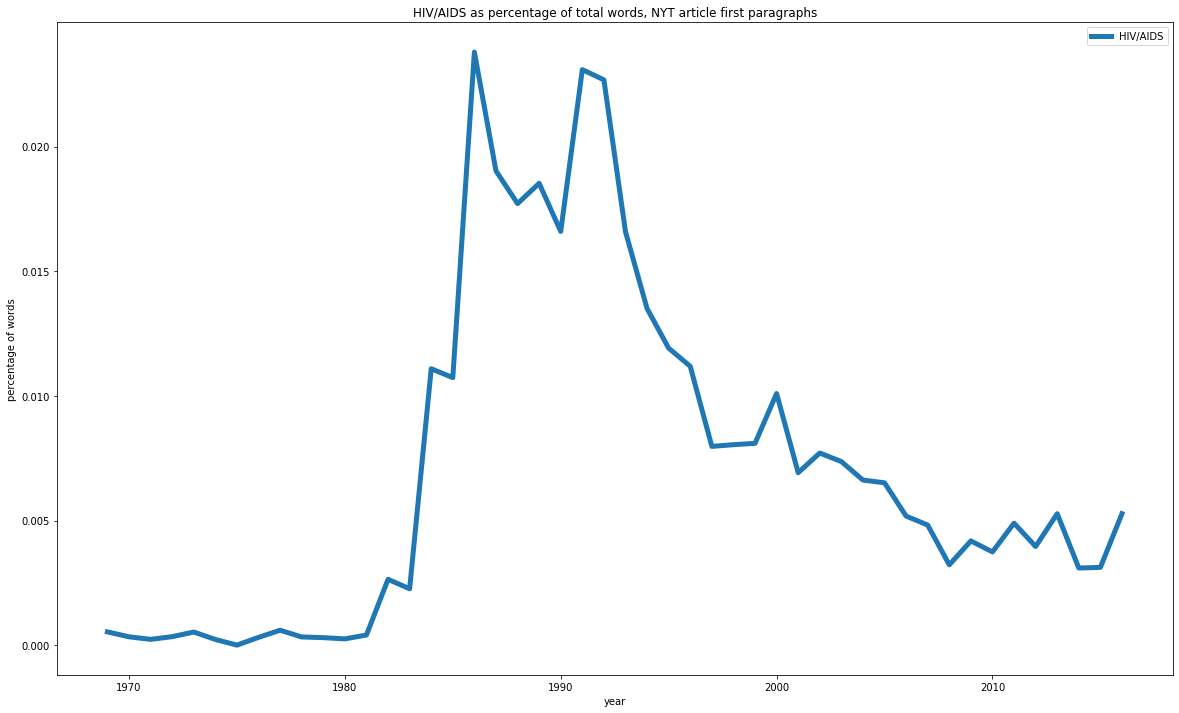

In [34]:
plt.figure(figsize=(20,12))
graph = sns.lineplot(range(1969, 2017), hiv_list, lw=5, label="HIV/AIDS");
graph.set(xlabel='year', ylabel='percentage of words');
graph.set_title("HIV/AIDS as percentage of total words, NYT article first paragraphs");

Focusing on the most interesting subplot here, we see some background word count (maybe due to alternate use of "aids," and the slow beginning of a spike in 1981, followed by a rapid rise, a decade of intense coverage, and then a gradual drop, mirroring the progression of the crisis itself